To do:
1. Add ultimate_parent column
2. Add dataset from ONS

Key findings within this notebook experiment:
1. GHG datasets from local authority improves the ML model

In [4]:
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 20)

In [5]:
scores_table_in_company = pd.read_csv("feature-eng-data/scores_table_in_company.csv", low_memory=False)

In [6]:
sic_table = pd.read_excel("feature-eng-data/sic_level_1_mapping.xlsx")

In [7]:
sic_table

,SIC,SIC_Desc,Level,Parent,Parent_Desc,root_parent
0,01,"Crop and animal production, hunting and relate...",2,A,"AGRICULTURE, FORESTRY AND FISHING",A
1,011,Growing of non-perennial crops,3,01,"Crop and animal production, hunting and relate...",A
2,0111,"Growing of cereals (except rice), leguminous c...",4,011,Growing of non-perennial crops,A
3,0112,Growing of rice,4,011,Growing of non-perennial crops,A
4,0113,"Growing of vegetables and melons, roots and tu...",4,011,Growing of non-perennial crops,A
...,...,...,...,...,...,...
1183,Q,HUMAN HEALTH AND SOCIAL WORK ACTIVITIES,1,ALL,ALL,ALL
1184,R,"ARTS, ENTERTAINMENT AND RECREATION",1,ALL,ALL,ALL
1185,S,OTHER SERVICE ACTIVITIES,1,ALL,ALL,ALL
1186,T,ACTIVITIES OF HOUSEHOLDS AS EMPLOYERS; UNDIFFE...,1,ALL,ALL,ALL


In [8]:
scores_table_in_company.shape

(879, 27)

In [9]:
scores_table_in_company.head(3)

,CompanyNumber,RegAddress_PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,SIC,AssetsM,EstAssetsM,TurnoverM,EstTurnoverM,FTE,EstFTE,CalculationType,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,S1S2TesCO2eEst,S1S2CO2e
0,00019457,M22 5TG,Public Limited Company,Active,United Kingdom,329,3152.0,0.038998,603.3,1.571170,3152.0,4.0,Actuals,0.060444,0.078988,0.015111,1.3750,88.414665,39.608,7.726939,10.0,10.0,9.0,9.0,9.0,4.752723,47.63
1,00024869,GL3 4AW,Public Limited Company,Active,United Kingdom,6512,1048.0,0.073508,486.0,1.357635,1048.0,4.0,Actuals,0.253968,0.954733,0.442748,0.0375,88.414665,39.608,7.726939,10.0,9.0,8.0,6.0,9.0,1.300129,269.00
2,00029559,TN15 7AE,Public Limited Company,Active,United Kingdom,701,76060.0,0.149742,291.2,8.971006,76060.0,2.0,Actuals,516.260563,755.762887,2.891494,0.3750,88.414665,39.608,7.726939,2.0,1.0,5.0,2.0,2.0,4.977054,219927.00


In [11]:
scores_table_in_company["S1S2CO2e"].describe()

count    8.790000e+02
mean     2.892892e+08
std      8.503005e+09
min      0.000000e+00
25%      2.509600e+02
50%      1.492600e+03
75%      1.276200e+04
max      2.520920e+11
Name: S1S2CO2e, dtype: float64

In [12]:
root_sic_map = {k: v for k, v in zip(sic_table['SIC'], sic_table['root_parent'])}
root_sic_map

{'01': 'A',
 '011': 'A',
 '0111': 'A',
 '0112': 'A',
 '0113': 'A',
 '0114': 'A',
 '0115': 'A',
 '0116': 'A',
 '0119': 'A',
 '012': 'A',
 '0121': 'A',
 '0122': 'A',
 '0123': 'A',
 '0124': 'A',
 '0125': 'A',
 '0126': 'A',
 '0127': 'A',
 '0128': 'A',
 '0129': 'A',
 '013': 'A',
 '0130': 'A',
 '014': 'A',
 '0141': 'A',
 '0142': 'A',
 '0143': 'A',
 '0144': 'A',
 '0145': 'A',
 '0146': 'A',
 '0147': 'A',
 '0149': 'A',
 '015': 'A',
 '0150': 'A',
 '016': 'A',
 '0161': 'A',
 '0162': 'A',
 '01621': 'A',
 '01629': 'A',
 '0163': 'A',
 '0164': 'A',
 '017': 'A',
 '0170': 'A',
 '02': 'A',
 '021': 'A',
 '0210': 'A',
 '022': 'A',
 '0220': 'A',
 '023': 'A',
 '0230': 'A',
 '024': 'A',
 '0240': 'A',
 '03': 'A',
 '031': 'A',
 '0311': 'A',
 '0312': 'A',
 '032': 'A',
 '0321': 'A',
 '0322': 'A',
 '05': 'B',
 '051': 'B',
 '0510': 'B',
 '05101': 'B',
 '05102': 'B',
 '052': 'B',
 '0520': 'B',
 '06': 'B',
 '061': 'B',
 '0610': 'B',
 '062': 'B',
 '0620': 'B',
 '07': 'B',
 '071': 'B',
 '0710': 'B',
 '072': 'B',
 '072

In [13]:
scores_table_in_company["root_parent"] = scores_table_in_company['SIC'].map(root_sic_map)

In [14]:
scores_table_in_company.groupby("root_parent").sum()["S1S2CO2e"]

/var/folders/p6/yvn5sdc10690vb5dljmbnblm0000gn/T/ipykernel_40376/2418631561.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scores_table_in_company.groupby("root_parent").sum()["S1S2CO2e"]


root_parent
A      9.275500e+04
ALL    2.076000e+03
B      2.551517e+07
C      4.454659e+07
D      2.270015e+05
E      3.873130e+04
F      2.516729e+05
G      3.350048e+06
H      1.112041e+07
I      2.372584e+06
J      3.322388e+06
K      2.540282e+11
L      1.684048e+05
M      1.559511e+08
N      9.807379e+06
O      1.027458e+03
P      2.984600e+03
Q      2.241114e+04
R      1.207667e+04
Name: S1S2CO2e, dtype: float64

In [15]:
scores_table_in_company = scores_table_in_company[scores_table_in_company['root_parent'] != 'ALL']

In [16]:
scores_table_in_company.groupby("root_parent").count()["SIC"]

root_parent
A      4
B     21
C     91
D      3
E      4
F     38
G     99
H     18
I     17
J     55
K    173
L     18
M    257
N     48
O      2
P      5
Q     17
R      6
Name: SIC, dtype: int64

In [ ]:
# import seaborn as sns

# # assuming scores_table_in_company is your DataFrame
# sns.boxplot(x=scores_table_in_company["S1S2CO2e"])

In [ ]:
# import matplotlib.pyplot as plt

# # assuming scores_table_in_company is your DataFrame
# plt.boxplot(scores_table_in_company["S1S2CO2e"].dropna())
# plt.show()

In [17]:
# Filter outlier

scores_table_in_company = scores_table_in_company[scores_table_in_company["S1S2CO2e"]<500000]

scores_table_in_company = scores_table_in_company[scores_table_in_company["AssetsM"]<175216.5]

In [18]:
scores_table_in_company.shape

(766, 28)

In [ ]:
# import matplotlib.pyplot as plt

# # assuming scores_table_in_company is your DataFrame
# plt.boxplot(scores_table_in_company["S1S2CO2e"].dropna())
# plt.show()

In [19]:
scores_table_in_company = scores_table_in_company.drop(columns=["RegAddress_PostCode", "CompanyCategory", "CompanyStatus", "CountryOfOrigin"])

# set 'CompanyNumber' as the index
scores_table_in_company.set_index('CompanyNumber', inplace=True)

In [20]:
scores_table_in_company

,SIC,AssetsM,EstAssetsM,TurnoverM,EstTurnoverM,FTE,EstFTE,CalculationType,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,S1S2TesCO2eEst,S1S2CO2e,root_parent
CompanyNumber,,,,,,,,,,,,,,,,,,,,,,,
00019457,329,3152.0,0.038998,603.300000,1.571170,3152.0,4.0,Actuals,0.060444,0.078988,0.015111,1.3750,88.414665,39.608,7.726939,10.0,10.0,9.0,9.0,9.0,4.752723,47.63,C
00024869,6512,1048.0,0.073508,486.000000,1.357635,1048.0,4.0,Actuals,0.253968,0.954733,0.442748,0.0375,88.414665,39.608,7.726939,10.0,9.0,8.0,6.0,9.0,1.300129,269.00,K
00029559,701,76060.0,0.149742,291.200000,8.971006,76060.0,2.0,Actuals,516.260563,755.762887,2.891494,0.3750,88.414665,39.608,7.726939,2.0,1.0,5.0,2.0,2.0,4.977054,219927.00,M
00030226,1712,584.0,0.320794,104.600000,16.076656,584.0,10.0,Actuals,473.260870,373.200000,67.099315,6.6250,88.414665,39.608,7.726939,2.0,2.0,2.0,5.0,2.0,574.223656,39186.00,C
00033774,2059,4017.0,0.170615,15700.000000,13.853500,4017.0,4.0,Actuals,1866.017132,319.124586,1247.263132,3.8750,88.414665,39.608,7.726939,1.0,2.0,1.0,2.0,1.0,2426.440525,431311.00,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SC334329,64202,381.0,20.194410,37.473996,NaN,381.0,NaN,Actuals,61.967019,33.135135,3.217848,0.0375,88.414665,39.608,7.726939,5.0,5.0,5.0,2.0,5.0,123.837290,0.00,K
SC367563,8299,1125.0,0.016182,108.500000,0.067786,1125.0,2.0,Actuals,5.116468,25.995413,2.518667,0.3750,88.414665,39.608,7.726939,8.0,5.0,5.0,6.0,6.0,1.148973,2272.20,N
SC419949,64921,0.0,0.000000,29.375452,68.728740,0.0,NaN,Actuals,20.503251,28.137931,0.000000,0.0375,88.414665,39.608,7.726939,7.0,5.0,NaN,2.0,6.0,132.280591,771.00,K


Add external dataset ONS

In [21]:
ons_table = pd.read_excel("feature-eng-data/onslevel1sic-data-compiled.xlsx")
ons_table.head(1)

,SIC,MeanTotalGHG,MeanCO2,MeanCH4,MeanN2O,MeanHFC,MeanPFC,MeanNF3,MeanSF6,GHGIntensity,CO2Intensity,PM10,PM25,CO,NMVOC,Benzene,Butadine,EnergyIntensity,Electricity,Petrol/diesel,Natural gas,OtherEenergy,EnergyTotal
0,A,52204.9,7905.175,29601.8,14685.771875,12.059375,0.0,0.0,0.0,4.78875,0.710938,22.977469,9.974531,71.89875,203.903531,0.266656,0.131,7.4,1.24,9.97,0.08,0.6,11.89


In [22]:
MeanTotalGHG_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['MeanTotalGHG'])}
MeanCO2_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['MeanCO2'])}
MeanCH4_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['MeanCH4'])}
MeanN2O_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['MeanN2O'])}
MeanHFC_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['MeanHFC'])}

MeanPFC_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['MeanPFC'])}
MeanNF3_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['MeanNF3'])}
MeanSF6_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['MeanSF6'])}

GHGIntensity_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['GHGIntensity'])}
CO2Intensity_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['CO2Intensity'])}
PM10_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['PM10'])}
PM25_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['PM25'])}
CO_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['CO'])}

NMVOC_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['NMVOC'])}
Benzene_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['Benzene'])}
Butadine_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['Butadine'])}
EnergyIntensity_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['EnergyIntensity'])}
Electricity_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['Electricity'])}

Petroldiesel_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['Petrol/diesel'])}
Naturalgas_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['Natural gas'])}
OtherEenergy_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['OtherEenergy'])}
EnergyTotal_dict = {k: v for k, v in zip(ons_table['SIC'], ons_table['EnergyTotal'])}

In [23]:
scores_table_in_company['MeanTotalGHG'] = scores_table_in_company['root_parent'].map(MeanTotalGHG_dict)
scores_table_in_company['MeanCO2'] = scores_table_in_company['root_parent'].map(MeanCO2_dict)
scores_table_in_company['MeanCH4'] = scores_table_in_company['root_parent'].map(MeanCH4_dict)
scores_table_in_company['MeanN2O'] = scores_table_in_company['root_parent'].map(MeanN2O_dict)
scores_table_in_company['MeanHFC'] = scores_table_in_company['root_parent'].map(MeanHFC_dict)

scores_table_in_company['MeanPFC'] = scores_table_in_company['root_parent'].map(MeanPFC_dict)
scores_table_in_company['MeanNF3'] = scores_table_in_company['root_parent'].map(MeanNF3_dict)
scores_table_in_company['MeanSF6'] = scores_table_in_company['root_parent'].map(MeanSF6_dict)
scores_table_in_company['GHGIntensity'] = scores_table_in_company['root_parent'].map(GHGIntensity_dict)
scores_table_in_company['CO2Intensity'] = scores_table_in_company['root_parent'].map(CO2Intensity_dict)

scores_table_in_company['PM10'] = scores_table_in_company['root_parent'].map(PM10_dict)
scores_table_in_company['PM25'] = scores_table_in_company['root_parent'].map(PM25_dict)
scores_table_in_company['CO'] = scores_table_in_company['root_parent'].map(CO_dict)
scores_table_in_company['NMVOC'] = scores_table_in_company['root_parent'].map(NMVOC_dict)
scores_table_in_company['Benzene'] = scores_table_in_company['root_parent'].map(Benzene_dict)

scores_table_in_company['Butadine'] = scores_table_in_company['root_parent'].map(Butadine_dict)
scores_table_in_company['EnergyIntensity'] = scores_table_in_company['root_parent'].map(EnergyIntensity_dict)
scores_table_in_company['Electricity'] = scores_table_in_company['root_parent'].map(Electricity_dict)
scores_table_in_company['Petrol/diesel'] = scores_table_in_company['root_parent'].map(Petroldiesel_dict)
scores_table_in_company['Natural gas'] = scores_table_in_company['root_parent'].map(Naturalgas_dict)

scores_table_in_company['OtherEenergy'] = scores_table_in_company['root_parent'].map(OtherEenergy_dict)
scores_table_in_company['EnergyTotal'] = scores_table_in_company['root_parent'].map(EnergyTotal_dict)

In [95]:
scores_table_in_company

,SIC,AssetsM,EstAssetsM,TurnoverM,EstTurnoverM,FTE,EstFTE,CalculationType,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,S1S2TesCO2eEst,S1S2CO2e,root_parent,MeanTotalGHG,MeanCO2,MeanCH4,MeanN2O,MeanHFC,MeanPFC,MeanNF3,MeanSF6,GHGIntensity,CO2Intensity,PM10,PM25,CO,NMVOC,Benzene,Butadine,EnergyIntensity,Electricity,Petrol/diesel,Natural gas,OtherEenergy,EnergyTotal
CompanyNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00019457,329,3152.0,0.038998,603.300000,1.571170,3152.0,4.0,Actuals,0.060444,0.078988,0.015111,1.3750,88.414665,39.608,7.726939,10.0,10.0,9.0,9.0,9.0,4.752723,47.63,C,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70
00024869,6512,1048.0,0.073508,486.000000,1.357635,1048.0,4.0,Actuals,0.253968,0.954733,0.442748,0.0375,88.414665,39.608,7.726939,10.0,9.0,8.0,6.0,9.0,1.300129,269.00,K,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03
00029559,701,76060.0,0.149742,291.200000,8.971006,76060.0,2.0,Actuals,516.260563,755.762887,2.891494,0.3750,88.414665,39.608,7.726939,2.0,1.0,5.0,2.0,2.0,4.977054,219927.00,M,2288.1,2144.109375,9.1,10.868750,100.643750,0.11875,0.0,23.209375,0.022500,0.020938,0.372188,0.322406,22.857313,4.384531,0.180563,0.039,1.6,0.88,1.12,0.17,0.08,2.25
00030226,1712,584.0,0.320794,104.600000,16.076656,584.0,10.0,Actuals,473.260870,373.200000,67.099315,6.6250,88.414665,39.608,7.726939,2.0,2.0,2.0,5.0,2.0,574.223656,39186.00,C,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70
00033774,2059,4017.0,0.170615,15700.000000,13.853500,4017.0,4.0,Actuals,1866.017132,319.124586,1247.263132,3.8750,88.414665,39.608,7.726939,1.0,2.0,1.0,2.0,1.0,2426.440525,431311.00,C,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SC334329,64202,381.0,20.194410,37.473996,NaN,381.0,NaN,Actuals,61.967019,33.135135,3.217848,0.0375,88.414665,39.608,7.726939,5.0,5.0,5.0,2.0,5.0,123.837290,0.00,K,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03
SC367563,8299,1125.0,0.016182,108.500000,0.067786,1125.0,2.0,Actuals,5.116468,25.995413,2.518667,0.3750,88.414665,39.608,7.726939,8.0,5.0,5.0,6.0,6.0,1.148973,2272.20,N,3310.9,3179.271875,10.5,20.143750,100.806250,0.14375,0.0,0.000000,0.049375,0.047813,1.115719,0.997531,50.637906,8.058969,0.377531,0.090,2.6,1.44,3.47,0.42,0.35,5.69
SC419949,64921,0.0,0.000000,29.375452,68.728740,0.0,NaN,Actuals,20.503251,28.137931,0.000000,0.0375,88.414665,39.608,7.726939,7.0,5.0,NaN,2.0,6.0,132.280591,771.00,K,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03


In [96]:
scores_table_in_company.to_excel("feature-eng-data/scores-ons-compiled1.xlsx")

Machine Learning

In [25]:
scores_table_in_company_sic = scores_table_in_company["SIC"]
scores_table_in_company_sic

CompanyNumber
00019457      329
00024869     6512
00029559      701
00030226     1712
00033774     2059
            ...  
SC334329    64202
SC367563     8299
SC419949    64921
SC440783     1011
SC578050    46431
Name: SIC, Length: 766, dtype: object

In [50]:
scores_table_in_company_S1S2TesCO2eEst = scores_table_in_company["S1S2TesCO2eEst"]
scores_table_in_company_S1S2TesCO2eEst

CompanyNumber
00019457       4.752723
00024869       1.300129
00029559       4.977054
00030226     574.223656
00033774    2426.440525
               ...     
SC334329     123.837290
SC367563       1.148973
SC419949     132.280591
SC440783     760.275821
SC578050    6554.077348
Name: S1S2TesCO2eEst, Length: 766, dtype: float64

In [27]:
scores_table = scores_table_in_company.drop(columns=["CalculationType", "SIC", "S1S2TesCO2eEst", "EstAssetsM", "EstTurnoverM", "EstFTE", "root_parent"])
scores_table.head()

,AssetsM,TurnoverM,FTE,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,S1S2CO2e,MeanTotalGHG,MeanCO2,MeanCH4,MeanN2O,MeanHFC,MeanPFC,MeanNF3,MeanSF6,GHGIntensity,CO2Intensity,PM10,PM25,CO,NMVOC,Benzene,Butadine,EnergyIntensity,Electricity,Petrol/diesel,Natural gas,OtherEenergy,EnergyTotal
CompanyNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00019457,3152.0,603.3,3152.0,0.060444,0.078988,0.015111,1.3750,88.414665,39.608,7.726939,10.0,10.0,9.0,9.0,9.0,47.63,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70
00024869,1048.0,486.0,1048.0,0.253968,0.954733,0.442748,0.0375,88.414665,39.608,7.726939,10.0,9.0,8.0,6.0,9.0,269.00,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03
00029559,76060.0,291.2,76060.0,516.260563,755.762887,2.891494,0.3750,88.414665,39.608,7.726939,2.0,1.0,5.0,2.0,2.0,219927.00,2288.1,2144.109375,9.1,10.868750,100.643750,0.11875,0.0,23.209375,0.022500,0.020938,0.372188,0.322406,22.857313,4.384531,0.180563,0.039,1.6,0.88,1.12,0.17,0.08,2.25
00030226,584.0,104.6,584.0,473.260870,373.200000,67.099315,6.6250,88.414665,39.608,7.726939,2.0,2.0,2.0,5.0,2.0,39186.00,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70
00033774,4017.0,15700.0,4017.0,1866.017132,319.124586,1247.263132,3.8750,88.414665,39.608,7.726939,1.0,2.0,1.0,2.0,1.0,431311.00,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70


In [28]:
missing_values = scores_table.isna().sum()
print(missing_values)

AssetsM                0
TurnoverM              0
FTE                    0
IR_CO2ePerAssetsM      0
IR_CO2ePerTurnoverM    0
                      ..
Electricity            1
Petrol/diesel          1
Natural gas            1
OtherEenergy           1
EnergyTotal            1
Length: 38, dtype: int64


In [29]:
scores_table.dtypes

AssetsM                float64
TurnoverM              float64
FTE                    float64
IR_CO2ePerAssetsM      float64
IR_CO2ePerTurnoverM    float64
                        ...   
Electricity            float64
Petrol/diesel          float64
Natural gas            float64
OtherEenergy           float64
EnergyTotal            float64
Length: 38, dtype: object

In [30]:
# fill missing values with the mean of each column
scores_table.fillna(scores_table.mean(), inplace=True)
missing_values = scores_table.isna().sum()
print(missing_values)

AssetsM                0
TurnoverM              0
FTE                    0
IR_CO2ePerAssetsM      0
IR_CO2ePerTurnoverM    0
                      ..
Electricity            0
Petrol/diesel          0
Natural gas            0
OtherEenergy           0
EnergyTotal            0
Length: 38, dtype: int64


In [31]:
scores_table.describe()

,AssetsM,TurnoverM,FTE,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,S1S2CO2e,MeanTotalGHG,MeanCO2,MeanCH4,MeanN2O,MeanHFC,MeanPFC,MeanNF3,MeanSF6,GHGIntensity,CO2Intensity,PM10,PM25,CO,NMVOC,Benzene,Butadine,EnergyIntensity,Electricity,Petrol/diesel,Natural gas,OtherEenergy,EnergyTotal
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,7.660000e+02,7.660000e+02,7.660000e+02,766.000000,766.00000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,4289.134634,890.410810,4289.134634,723.249969,427.695733,99.173524,1.569726,8.841466e+01,3.960800e+01,7.726939e+00,5.701044,5.80000,5.195021,5.069829,5.309211,21977.424722,20789.654771,18314.416622,618.005621,794.909028,949.867030,46.758558,0.034118,65.649804,0.218869,0.170824,8.714548,5.800198,106.088295,66.875960,0.725281,0.134550,3.724575,1.689451,1.775712,0.662484,1.618183,5.735373
std,14051.864906,3560.364803,14051.864906,8767.514069,8250.402957,876.718596,7.351651,1.422014e-14,7.063507e-15,1.765877e-15,2.763095,2.71611,2.456817,2.164267,2.428140,64710.107373,40116.859204,36357.657077,4129.398452,2080.101067,1687.417835,130.300193,0.095243,158.822245,0.620137,0.477340,15.893001,11.815098,192.747891,127.984057,1.176466,0.191486,3.321784,2.245314,2.234941,1.437566,3.088058,5.917725
min,0.000000,0.043317,0.000000,0.004295,0.000000,0.000000,0.037500,8.841466e+01,3.960800e+01,7.726939e+00,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,305.100000,268.003125,1.000000,0.946875,4.253125,0.000000,0.000000,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003000,1.300000,0.420000,0.170000,0.070000,0.010000,1.030000
25%,139.250000,45.613176,139.250000,10.202926,4.402509,0.705485,0.125000,8.841466e+01,3.960800e+01,7.726939e+00,3.000000,3.25000,3.000000,4.000000,3.000000,223.000000,1116.900000,1051.487500,4.700000,6.668750,54.034375,0.075000,0.000000,0.000000,0.022500,0.020938,0.232844,0.197531,14.093125,2.569375,0.063969,0.015000,1.600000,0.880000,0.690000,0.120000,0.080000,2.250000
50%,460.500000,91.066500,460.500000,34.789544,16.950000,3.222714,0.375000,8.841466e+01,3.960800e+01,7.726939e+00,6.000000,6.00000,5.195021,5.000000,5.000000,1216.850000,2288.100000,2144.109375,9.100000,10.868750,100.643750,0.118750,0.000000,0.000000,0.045313,0.040313,0.372188,0.322406,22.857313,4.384531,0.180563,0.039000,2.600000,0.880000,1.120000,0.170000,0.080000,2.630000
75%,1812.500000,350.050000,1812.500000,134.668474,52.877446,9.891508,0.875000,8.841466e+01,3.960800e+01,7.726939e+00,8.000000,8.00000,7.000000,6.000000,7.000000,7210.260000,15214.900000,12694.615625,46.300000,97.940625,398.290625,0.118750,0.000000,23.209375,0.083125,0.070313,4.089688,3.473219,106.895281,86.132250,0.889250,0.241000,5.300000,2.090000,2.160000,0.830000,1.900000,9.740000
max,155000.000000,47150.000000,155000.000000,217037.037037,226923.741935,16847.666667,99.750000,8.841466e+01,3.960800e+01,7.726939e+00,10.000000,10.00000,9.000000,10.000000,10.000000,454154.000000,164517.200000,156777.256250,46499.400000,14685.771875,5166.559375,410.506250,0.300000,504.234375,6.696875,6.377188,51.770344,48.158812,632.933031,409.348156,3.675875,0.593000,24.300000,33.530000,13.970000,20.760000,9.380000,56.280000


In [32]:
scores_table

,AssetsM,TurnoverM,FTE,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,S1S2CO2e,MeanTotalGHG,MeanCO2,MeanCH4,MeanN2O,MeanHFC,MeanPFC,MeanNF3,MeanSF6,GHGIntensity,CO2Intensity,PM10,PM25,CO,NMVOC,Benzene,Butadine,EnergyIntensity,Electricity,Petrol/diesel,Natural gas,OtherEenergy,EnergyTotal
CompanyNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00019457,3152.0,603.300000,3152.0,0.060444,0.078988,0.015111,1.3750,88.414665,39.608,7.726939,10.0,10.0,9.000000,9.0,9.0,47.63,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70
00024869,1048.0,486.000000,1048.0,0.253968,0.954733,0.442748,0.0375,88.414665,39.608,7.726939,10.0,9.0,8.000000,6.0,9.0,269.00,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03
00029559,76060.0,291.200000,76060.0,516.260563,755.762887,2.891494,0.3750,88.414665,39.608,7.726939,2.0,1.0,5.000000,2.0,2.0,219927.00,2288.1,2144.109375,9.1,10.868750,100.643750,0.11875,0.0,23.209375,0.022500,0.020938,0.372188,0.322406,22.857313,4.384531,0.180563,0.039,1.6,0.88,1.12,0.17,0.08,2.25
00030226,584.0,104.600000,584.0,473.260870,373.200000,67.099315,6.6250,88.414665,39.608,7.726939,2.0,2.0,2.000000,5.0,2.0,39186.00,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70
00033774,4017.0,15700.000000,4017.0,1866.017132,319.124586,1247.263132,3.8750,88.414665,39.608,7.726939,1.0,2.0,1.000000,2.0,1.0,431311.00,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SC334329,381.0,37.473996,381.0,61.967019,33.135135,3.217848,0.0375,88.414665,39.608,7.726939,5.0,5.0,5.000000,2.0,5.0,0.00,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03
SC367563,1125.0,108.500000,1125.0,5.116468,25.995413,2.518667,0.3750,88.414665,39.608,7.726939,8.0,5.0,5.000000,6.0,6.0,2272.20,3310.9,3179.271875,10.5,20.143750,100.806250,0.14375,0.0,0.000000,0.049375,0.047813,1.115719,0.997531,50.637906,8.058969,0.377531,0.090,2.6,1.44,3.47,0.42,0.35,5.69
SC419949,0.0,29.375452,0.0,20.503251,28.137931,0.000000,0.0375,88.414665,39.608,7.726939,7.0,5.0,5.195021,2.0,6.0,771.00,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03


In [33]:
# Get the column names from the first to second last
S1S2CO2e = scores_table["S1S2CO2e"]

# Select the desired columns using the loc[] or iloc[] indexer
scores_table = scores_table.drop(columns="S1S2CO2e")

# Convert the series to a dataframe with a single column
S1S2CO2e_df = pd.DataFrame(S1S2CO2e, columns=["S1S2CO2e"])

# Concatenate the S1S2CO2e_df to the scores_table dataframe along the columns (axis=1)
result_df = pd.concat([scores_table, S1S2CO2e_df], axis=1)

In [36]:
result_df

,AssetsM,TurnoverM,FTE,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,MeanTotalGHG,MeanCO2,MeanCH4,MeanN2O,MeanHFC,MeanPFC,MeanNF3,MeanSF6,GHGIntensity,CO2Intensity,PM10,PM25,CO,NMVOC,Benzene,Butadine,EnergyIntensity,Electricity,Petrol/diesel,Natural gas,OtherEenergy,EnergyTotal,S1S2CO2e
CompanyNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00019457,3152.0,603.300000,3152.0,0.060444,0.078988,0.015111,1.3750,88.414665,39.608,7.726939,10.0,10.0,9.000000,9.0,9.0,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70,47.63
00024869,1048.0,486.000000,1048.0,0.253968,0.954733,0.442748,0.0375,88.414665,39.608,7.726939,10.0,9.0,8.000000,6.0,9.0,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03,269.00
00029559,76060.0,291.200000,76060.0,516.260563,755.762887,2.891494,0.3750,88.414665,39.608,7.726939,2.0,1.0,5.000000,2.0,2.0,2288.1,2144.109375,9.1,10.868750,100.643750,0.11875,0.0,23.209375,0.022500,0.020938,0.372188,0.322406,22.857313,4.384531,0.180563,0.039,1.6,0.88,1.12,0.17,0.08,2.25,219927.00
00030226,584.0,104.600000,584.0,473.260870,373.200000,67.099315,6.6250,88.414665,39.608,7.726939,2.0,2.0,2.000000,5.0,2.0,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70,39186.00
00033774,4017.0,15700.000000,4017.0,1866.017132,319.124586,1247.263132,3.8750,88.414665,39.608,7.726939,1.0,2.0,1.000000,2.0,1.0,122937.8,110754.621875,319.9,5781.643750,5166.559375,410.50625,0.3,504.234375,0.814688,0.724688,42.680938,32.870906,632.933031,409.348156,3.675875,0.593,2.6,1.81,0.69,0.83,9.38,12.70,431311.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SC334329,381.0,37.473996,381.0,61.967019,33.135135,3.217848,0.0375,88.414665,39.608,7.726939,5.0,5.0,5.000000,2.0,5.0,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03,0.00
SC367563,1125.0,108.500000,1125.0,5.116468,25.995413,2.518667,0.3750,88.414665,39.608,7.726939,8.0,5.0,5.000000,6.0,6.0,3310.9,3179.271875,10.5,20.143750,100.806250,0.14375,0.0,0.000000,0.049375,0.047813,1.115719,0.997531,50.637906,8.058969,0.377531,0.090,2.6,1.44,3.47,0.42,0.35,5.69,2272.20
SC419949,0.0,29.375452,0.0,20.503251,28.137931,0.000000,0.0375,88.414665,39.608,7.726939,7.0,5.0,5.195021,2.0,6.0,305.1,268.003125,1.0,0.946875,35.025000,0.08125,0.0,0.000000,0.000000,0.000000,0.032344,0.027031,2.050844,0.366812,0.015906,0.003,6.2,0.78,0.17,0.07,0.01,1.03,771.00


In [ ]:
result

In [37]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
normalised_score_table = scaler.fit_transform(result_df)

S1S2CO2e = normalised_score_table[:, -1]
S1S2CO2e = S1S2CO2e.reshape(-1, 1)

# drop the last column
normalised_score_table = np.delete(normalised_score_table, -1, axis=1)

In [39]:
normalised_score_table.shape

(766, 37)

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split

X = normalised_score_table
Y = S1S2CO2e

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.70, test_size=0.30, random_state=0)

print('Number of instances in X: {}'.format(np.shape(X)[0]))
print('Number of instances in X_train: {}'.format(X_train.shape[0]))
print('Number of instances in X_test: {}'.format(X_test.shape[0]))
print('Number of instances in X_train and X_test together: {}'.format(X_train.shape[0] + X_test.shape[0]))

Number of instances in X: 766
Number of instances in X_train: 536
Number of instances in X_test: 230
Number of instances in X_train and X_test together: 766


Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_regressor = LinearRegression(fit_intercept=True, copy_X=True)
linear_regressor.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(linear_regressor.score(X_train, y_train)))

print('Testing accuracy by using score function: {:.3f}'.format(linear_regressor.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, linear_regressor.predict(X_test))))

Training accuracy: 0.422
Testing accuracy by using score function: 0.266
Testing accuracy by using r2_score meric: 0.266


In [42]:
from sklearn.model_selection import cross_val_score

# perform 10-fold cross-validation
cv_scores = cross_val_score(linear_regressor, X_train, y_train, cv=10)

# print the cross-validation scores
print('Cross-validation scores: ', cv_scores)

# print the mean of the cross-validation scores
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores:  [  0.20094416   0.40595959   0.31407991   0.26470763 -65.56016396
  -0.35435132  -0.08376905   0.55529722   0.21883355   0.50706401]
Mean cross-validation score: -6.353


In [43]:
from sklearn.metrics import mean_squared_error

# make predictions on the test set
y_pred_train = linear_regressor.predict(X_train)
y_pred = linear_regressor.predict(X_test)

# calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Root Mean Squared Error: {:.3f}'.format(rmse))

Root Mean Squared Error: 0.130


In [44]:
y_pred

array([[-3.68691683e-02],
       [ 1.51281357e-02],
       [ 3.72991562e-02],
       [ 6.25271797e-02],
       [ 2.36730576e-02],
       [ 4.99815822e-01],
       [ 2.56822646e-01],
       [ 1.24173164e-02],
       [ 2.12202072e-02],
       [ 3.90222073e-02],
       [ 4.03966904e-02],
       [ 1.10113621e-03],
       [ 2.46994495e-02],
       [ 2.09748745e-02],
       [-1.13606453e-04],
       [-2.40004063e-02],
       [ 4.38885689e-02],
       [ 1.78925991e-02],
       [ 6.53790236e-02],
       [ 4.61730957e-02],
       [ 3.37553024e-02],
       [ 5.88099360e-02],
       [ 6.74776435e-02],
       [ 3.72838974e-02],
       [ 5.91297150e-02],
       [ 1.54646039e-02],
       [ 1.71055794e-02],
       [ 9.36031342e-04],
       [-2.33137608e-02],
       [ 6.71212673e-02],
       [ 5.85765839e-02],
       [ 1.33093834e-01],
       [ 9.54508781e-04],
       [-1.75092816e-02],
       [ 4.53729630e-02],
       [ 6.25896454e-02],
       [ 1.02759004e-02],
       [-2.30053067e-02],
       [-1.4

In [45]:
y_pred_combined = np.concatenate((y_pred_train, y_pred), axis=0)
y_pred_combined.shape

(766, 1)

In [46]:
# Assuming y_pred is already defined and has the same number of rows as normalised_score_table

# Append y_pred to the normalised_score_table
combined_table = np.hstack((normalised_score_table, y_pred_combined))

# Inverse transform the combined table
inverse_transformed_table = scaler.inverse_transform(combined_table)

# Extract the inverse transformed y_pred
inverse_transformed_y_pred = inverse_transformed_table[:, -1]


In [47]:
inverse_transformed_y_pred

array([ 5.49259125e+04, -4.98758999e+02, -1.55812311e+04,  9.50175820e+03,
        1.45161093e+05,  3.22282229e+04, -1.14931127e+04,  2.46178238e+04,
        4.12325485e+03,  2.55166999e+03,  7.37126549e+03,  1.85264944e+04,
        2.27798732e+04,  9.52371172e+03,  2.31283413e+02,  1.15989011e+04,
       -2.16441103e+04,  3.63550239e+04,  4.04851274e+04,  8.23952573e+03,
        3.75231351e+04,  6.15537632e+02,  2.42680564e+04, -4.60460804e+03,
        2.87488747e+04,  1.33403211e+04,  3.11310072e+04, -5.77353130e+03,
        1.04006072e+04,  3.54025499e+03,  1.59901729e+04,  8.05301558e+03,
        2.22508503e+04,  7.24372665e+04,  4.22542668e+04,  2.29783752e+04,
        2.00025503e+04,  2.31706783e+04, -2.10956514e+04,  4.19892004e+04,
        8.67180157e+03,  1.18147277e+04,  3.71049625e+03,  2.06284015e+04,
       -5.64903781e+03,  1.15367220e+04, -6.31373399e+03, -4.31528722e+03,
        1.10882666e+05,  4.37917168e+03,  4.30234791e+04,  9.19892960e+03,
        3.44579802e+04,  

In [48]:

# My model prediction
inverse_transformed_y_pred_series = pd.Series(inverse_transformed_y_pred)
inverse_transformed_y_pred_series.describe()

count       766.000000
mean      20817.981602
std       39256.187622
min      -95107.101453
25%          96.760599
50%       13376.756945
75%       27838.947465
max      454413.435888
dtype: float64

In [51]:
# CienDos current prediction
scores_table_in_company_S1S2TesCO2eEst.describe()

count      766.000000
mean      1300.001027
std       6595.858838
min          0.000000
25%          1.321573
50%          4.977054
75%        421.524366
max      87146.468861
Name: S1S2TesCO2eEst, dtype: float64

In [52]:
# Ground truth
scores_table_in_company["S1S2CO2e"].describe()

count       766.000000
mean      21977.424722
std       64710.107373
min           0.000000
25%         223.000000
50%        1216.850000
75%        7210.260000
max      454154.000000
Name: S1S2CO2e, dtype: float64

In [53]:
linear_regressor.coef_

array([[ 2.73952159e-01,  3.73744459e-01,  2.73935124e-01,
        -7.18385292e-02,  6.30620299e-01,  9.71250632e-02,
        -3.31298652e-01, -8.32262081e+07,  1.89685726e-02,
         2.15616673e+07, -7.54929916e-02, -1.29030507e-01,
        -8.85294719e-02, -4.34266515e-02,  2.40097471e-01,
         6.58248126e+10, -1.77541805e+10,  1.67763584e+09,
        -2.99984778e+09, -1.54355725e+10,  8.71264122e+10,
        -8.52272403e+10, -1.39193355e+09, -2.62185685e+10,
        -8.90418839e+09, -2.25186413e+09, -8.26284255e+09,
        -1.62798313e+10,  5.68881218e+09, -3.88802431e+10,
         3.64121538e+10, -3.34971040e+08,  4.29800417e+10,
         1.36003302e+10,  1.77142072e+10,  1.56879567e+10,
        -6.66915808e+10]])

Feature: 0, Score: 0.27395
Feature: 1, Score: 0.37374
Feature: 2, Score: 0.27394
Feature: 3, Score: -0.07184
Feature: 4, Score: 0.63062
Feature: 5, Score: 0.09713
Feature: 6, Score: -0.33130
Feature: 7, Score: -83226208.12265
Feature: 8, Score: 0.01897
Feature: 9, Score: 21561667.29334
Feature: 10, Score: -0.07549
Feature: 11, Score: -0.12903
Feature: 12, Score: -0.08853
Feature: 13, Score: -0.04343
Feature: 14, Score: 0.24010
Feature: 15, Score: 65824812640.97877
Feature: 16, Score: -17754180503.65612
Feature: 17, Score: 1677635842.03076
Feature: 18, Score: -2999847780.28159
Feature: 19, Score: -15435572519.13313
Feature: 20, Score: 87126412224.77658
Feature: 21, Score: -85227240304.62015
Feature: 22, Score: -1391933549.22858
Feature: 23, Score: -26218568514.10756
Feature: 24, Score: -8904188392.45250
Feature: 25, Score: -2251864126.73808
Feature: 26, Score: -8262842551.37212
Feature: 27, Score: -16279831286.91734
Feature: 28, Score: 5688812181.32603
Feature: 29, Score: -38880243147.1

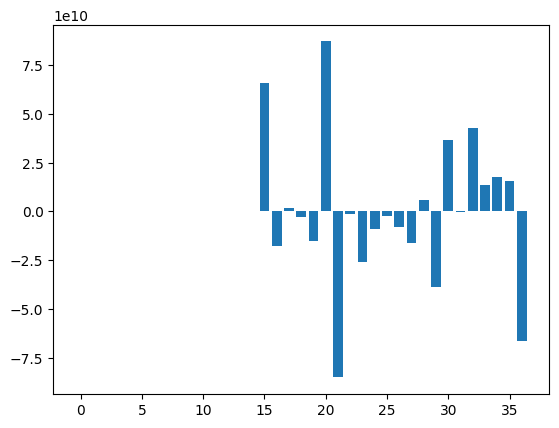

In [66]:
import matplotlib.pyplot as plt

Coef = linear_regressor.coef_
Coef_1d = Coef.flatten()

# summarize feature importance
for i,v in enumerate(Coef_1d):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(Coef_1d))], Coef_1d)
plt.show()

In [68]:
from sklearn.preprocessing import PolynomialFeatures
# Polynomial feature

def polynomial_regression(X, y):

    poly = PolynomialFeatures(2)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, train_size=0.7, test_size=0.3, random_state=0)
    
    # Fitting the model
    linreg = LinearRegression(fit_intercept=True, copy_X=True)
    linreg.fit(X_train, y_train)
    y_pred_train = linreg.predict(X_train)
    y_pred_test = linreg.predict(X_test)

    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

#     print("The model parameter (slopes) are\n", linear_regressor.coef_)
#     print(f"\nThe model parameter (intercept) is {linear_regressor.intercept_:.4f}")
    
    print(f"\nThe R2 score is {linreg.score(X_train, y_train):.4f}")

    print(f"\nRMSE train is {rmse_train:.4f}")
    print(f"\nRMSE test is {rmse_test:.4f}")
    
polynomial_regression(X, Y)


The R2 score is 0.8015

RMSE train is 0.0616

RMSE test is 5321611889.5728


Ridge Regression

In [69]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ridge_regressor = Ridge(fit_intercept=True, copy_X=True)
ridge_regressor.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(ridge_regressor.score(X_train, y_train)))

print('Testing accuracy by using score function: {:.3f}'.format(ridge_regressor.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, ridge_regressor.predict(X_test))))

Training accuracy: 0.392
Testing accuracy by using score function: 0.265
Testing accuracy by using r2_score meric: 0.265


In [70]:
from sklearn.model_selection import cross_val_score

# perform 10-fold cross-validation
cv_scores = cross_val_score(ridge_regressor, X_train, y_train, cv=10)

# print the cross-validation scores
print('Cross-validation scores: ', cv_scores)

# print the mean of the cross-validation scores
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores:  [ 0.30756157  0.52420187  0.3109131   0.24933894  0.232798    0.34501008
 -0.04836236  0.50885673  0.2154412   0.45093364]
Mean cross-validation score: 0.310


In [71]:
from sklearn.metrics import mean_squared_error

# make predictions on the test set
y_pred = ridge_regressor.predict(X_test)

# calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Root Mean Squared Error: {:.3f}'.format(rmse))

Root Mean Squared Error: 0.130


Feature: 0, Score: 0.27300
Feature: 1, Score: 0.27017
Feature: 2, Score: 0.27300
Feature: 3, Score: -0.03534
Feature: 4, Score: 0.31075
Feature: 5, Score: 0.04178
Feature: 6, Score: -0.22821
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.05615
Feature: 9, Score: 0.00000
Feature: 10, Score: -0.01651
Feature: 11, Score: -0.06511
Feature: 12, Score: -0.06184
Feature: 13, Score: -0.02621
Feature: 14, Score: 0.06079
Feature: 15, Score: 0.05988
Feature: 16, Score: 0.06892
Feature: 17, Score: 0.00540
Feature: 18, Score: -0.06017
Feature: 19, Score: -0.06274
Feature: 20, Score: -0.05941
Feature: 21, Score: -0.05946
Feature: 22, Score: 0.05504
Feature: 23, Score: 0.02370
Feature: 24, Score: 0.05815
Feature: 25, Score: -0.05440
Feature: 26, Score: 0.03689
Feature: 27, Score: -0.05304
Feature: 28, Score: 0.09970
Feature: 29, Score: 0.05743
Feature: 30, Score: -0.03777
Feature: 31, Score: -0.07200
Feature: 32, Score: -0.05578
Feature: 33, Score: 0.01241
Feature: 34, Score: 0.00770
Feature: 35, Sc

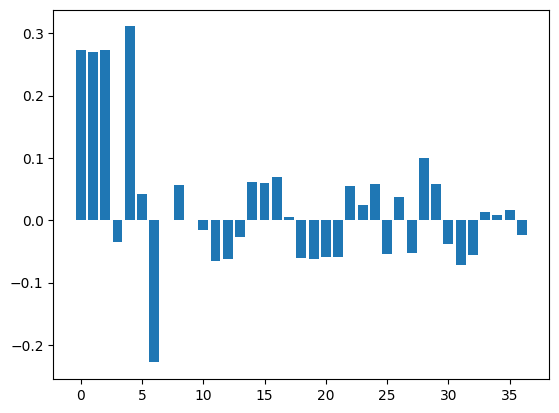

In [73]:
import matplotlib.pyplot as plt

Coef = ridge_regressor.coef_
Coef_1d = Coef.flatten()

# summarize feature importance
for i,v in enumerate(Coef_1d):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(Coef_1d))], Coef_1d)
plt.show()

SGD Regressor

In [74]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(sgd_regressor.score(X_train, y_train)))

print('Testing accuracy by using score function: {:.3f}'.format(sgd_regressor.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, sgd_regressor.predict(X_test))))

Training accuracy: 0.089
Testing accuracy by using score function: 0.088
Testing accuracy by using r2_score meric: 0.088


/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
from sklearn.model_selection import cross_val_score

# perform 10-fold cross-validation
cv_scores = cross_val_score(sgd_regressor, X_train, y_train, cv=10)

# print the cross-validation scores
print('Cross-validation scores: ', cv_scores)

# print the mean of the cross-validation scores
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores:  [0.02764596 0.08585818 0.10589707 0.08571609 0.03512893 0.06826814
 0.00673269 0.11045415 0.02889246 0.07185981]
Mean cross-validation score: 0.063


/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

In [52]:
from sklearn.metrics import mean_squared_error

# make predictions on the test set
y_pred = sgd_regressor.predict(X_test)

# calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Root Mean Squared Error: {:.3f}'.format(rmse))

Root Mean Squared Error: 0.161


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00346
Feature: 3, Score: 0.00038
Feature: 4, Score: 0.00927
Feature: 5, Score: 0.00120
Feature: 6, Score: 0.00082
Feature: 7, Score: 0.02564
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.02564
Feature: 10, Score: -0.01588
Feature: 11, Score: -0.03100
Feature: 12, Score: -0.01896
Feature: 13, Score: -0.00940
Feature: 14, Score: -0.02365


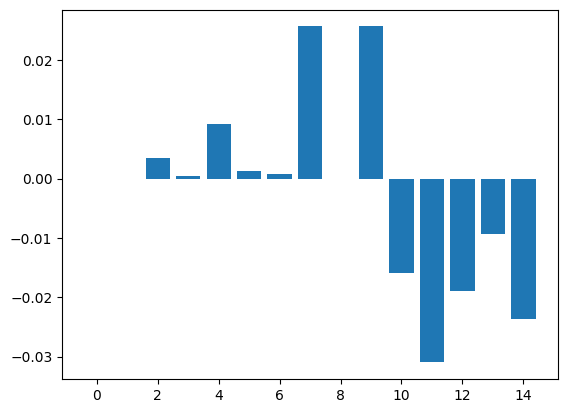

In [59]:
# summarize feature importance
for i,v in enumerate(sgd_regressor.coef_):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(sgd_regressor.coef_))], sgd_regressor.coef_)
plt.show()

Random Forest Regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(rf_regressor.score(X_train, y_train)))

print('Testing accuracy by using score function: {:.3f}'.format(rf_regressor.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, rf_regressor.predict(X_test))))

/var/folders/p6/yvn5sdc10690vb5dljmbnblm0000gn/T/ipykernel_40376/2307033513.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


Training accuracy: 0.914
Testing accuracy by using score function: 0.357
Testing accuracy by using r2_score meric: 0.357


In [77]:
from sklearn.model_selection import cross_val_score

# perform 10-fold cross-validation
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=10)

# print the cross-validation scores
print('Cross-validation scores: ', cv_scores)

# print the mean of the cross-validation scores
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages

Cross-validation scores:  [0.5591836  0.64181281 0.47807259 0.27470854 0.44454786 0.10753651
 0.03894841 0.50649332 0.39900464 0.11207262]
Mean cross-validation score: 0.356


In [78]:
from sklearn.metrics import mean_squared_error

# make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Root Mean Squared Error: {:.3f}'.format(rmse))

Root Mean Squared Error: 0.121


Feature: 0, Score: 0.19249
Feature: 1, Score: 0.23503
Feature: 2, Score: 0.17567
Feature: 3, Score: 0.03246
Feature: 4, Score: 0.07786
Feature: 5, Score: 0.11247
Feature: 6, Score: 0.01272
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00079
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00831
Feature: 11, Score: 0.00858
Feature: 12, Score: 0.02872
Feature: 13, Score: 0.00752
Feature: 14, Score: 0.01636
Feature: 15, Score: 0.00532
Feature: 16, Score: 0.00243
Feature: 17, Score: 0.00266
Feature: 18, Score: 0.00309
Feature: 19, Score: 0.01749
Feature: 20, Score: 0.00655
Feature: 21, Score: 0.00023
Feature: 22, Score: 0.00200
Feature: 23, Score: 0.00566
Feature: 24, Score: 0.00277
Feature: 25, Score: 0.00132
Feature: 26, Score: 0.00196
Feature: 27, Score: 0.00544
Feature: 28, Score: 0.00322
Feature: 29, Score: 0.00533
Feature: 30, Score: 0.00629
Feature: 31, Score: 0.00365
Feature: 32, Score: 0.00223
Feature: 33, Score: 0.00296
Feature: 34, Score: 0.00422
Feature: 35, Score: 0.00347
Fe

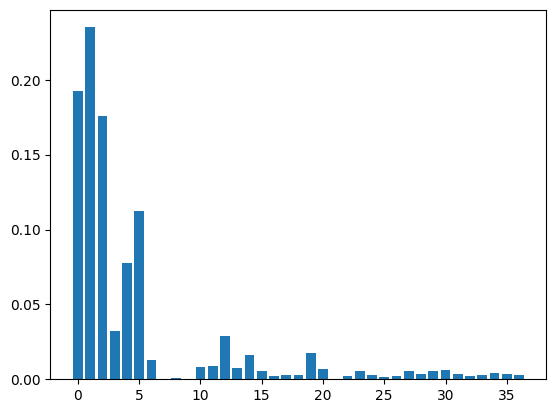

In [79]:
# summarize feature importance
for i,v in enumerate(rf_regressor.feature_importances_):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(rf_regressor.feature_importances_))], rf_regressor.feature_importances_)
plt.show()

In [86]:
from sklearn.preprocessing import PolynomialFeatures
# Polynomial feature

def polynomial_regression(X, y):

    poly = PolynomialFeatures(2)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, train_size=0.7, test_size=0.3, random_state=0)
    
    # Fitting the model
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)

    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

#     print("The model parameter (slopes) are\n", linear_regressor.coef_)
#     print(f"\nThe model parameter (intercept) is {linear_regressor.intercept_:.4f}")
    
    print(f"\nThe R2 score is {rf.score(X_train, y_train):.4f}")

    print(f"\nRMSE train is {rmse_train:.4f}")
    print(f"\nRMSE test is {rmse_test:.4f}")
    
    print(X_poly.shape)
    
polynomial_regression(X, Y)

/var/folders/p6/yvn5sdc10690vb5dljmbnblm0000gn/T/ipykernel_40376/306598030.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)



The R2 score is 0.9249

RMSE train is 0.0379

RMSE test is 0.1073
(766, 741)


Ada Boost Regressor

In [87]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

ab_regressor = AdaBoostRegressor()
ab_regressor.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(ab_regressor.score(X_train, y_train)))

print('Testing accuracy by using score function: {:.3f}'.format(ab_regressor.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, ab_regressor.predict(X_test))))

Training accuracy: 0.707
Testing accuracy by using score function: 0.205
Testing accuracy by using r2_score meric: 0.205


/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
from sklearn.model_selection import cross_val_score

# perform 10-fold cross-validation
cv_scores = cross_val_score(ab_regressor, X_train, y_train, cv=10)

# print the cross-validation scores
print('Cross-validation scores: ', cv_scores)

# print the mean of the cross-validation scores
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Cross-validation scores:  [ 0.55689084  0.42548811  0.11179698  0.20949405  0.38572306 -0.31991704
 -0.21010483  0.33985524  0.09661107 -0.31504973]
Mean cross-validation score: 0.128


/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
from sklearn.metrics import mean_squared_error

# make predictions on the test set
y_pred = ab_regressor.predict(X_test)

# calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Root Mean Squared Error: {:.3f}'.format(rmse))

Root Mean Squared Error: 0.135


Feature: 0, Score: 0.19819
Feature: 1, Score: 0.23537
Feature: 2, Score: 0.20964
Feature: 3, Score: 0.03647
Feature: 4, Score: 0.07831
Feature: 5, Score: 0.10652
Feature: 6, Score: 0.01254
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00063
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00002
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02573
Feature: 13, Score: 0.03053
Feature: 14, Score: 0.01559
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00351
Feature: 18, Score: 0.00335
Feature: 19, Score: 0.00538
Feature: 20, Score: 0.00943
Feature: 21, Score: 0.01505
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00467
Feature: 25, Score: 0.00013
Feature: 26, Score: 0.00810
Feature: 27, Score: 0.00007
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00072
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

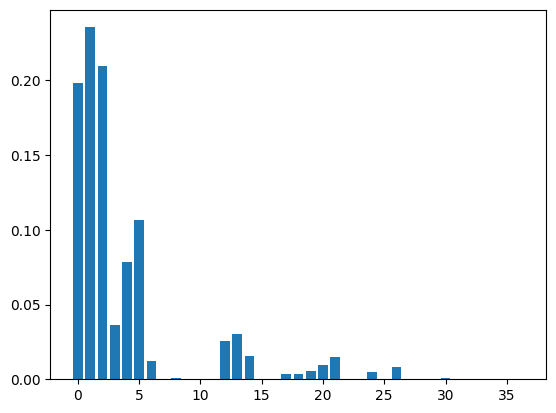

In [90]:
# summarize feature importance
for i,v in enumerate(ab_regressor.feature_importances_):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(ab_regressor.feature_importances_))], ab_regressor.feature_importances_)
plt.show()

In [91]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(gb_regressor.score(X_train, y_train)))

print('Testing accuracy by using score function: {:.3f}'.format(gb_regressor.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, gb_regressor.predict(X_test))))

/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy: 0.966
Testing accuracy by using score function: 0.305
Testing accuracy by using r2_score meric: 0.305


In [92]:
from sklearn.model_selection import cross_val_score

# perform 10-fold cross-validation
cv_scores = cross_val_score(gb_regressor, X_train, y_train, cv=10)

# print the cross-validation scores
print('Cross-validation scores: ', cv_scores)

# print the mean of the cross-validation scores
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when 

Cross-validation scores:  [ 0.51995872  0.7390665   0.39899102  0.26826006  0.51176623 -0.29701375
 -0.47901666  0.60924237  0.41003046  0.43009776]
Mean cross-validation score: 0.311


In [93]:
from sklearn.metrics import mean_squared_error

# make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Root Mean Squared Error: {:.3f}'.format(rmse))

Root Mean Squared Error: 0.126


Feature: 0, Score: 0.16904
Feature: 1, Score: 0.24976
Feature: 2, Score: 0.20452
Feature: 3, Score: 0.00473
Feature: 4, Score: 0.09264
Feature: 5, Score: 0.17712
Feature: 6, Score: 0.02401
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00699
Feature: 11, Score: 0.00156
Feature: 12, Score: 0.00093
Feature: 13, Score: 0.00505
Feature: 14, Score: 0.00168
Feature: 15, Score: 0.00114
Feature: 16, Score: 0.01127
Feature: 17, Score: 0.00170
Feature: 18, Score: 0.00479
Feature: 19, Score: 0.01370
Feature: 20, Score: 0.00107
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00386
Feature: 23, Score: 0.00002
Feature: 24, Score: 0.01118
Feature: 25, Score: 0.00022
Feature: 26, Score: 0.00232
Feature: 27, Score: 0.00306
Feature: 28, Score: 0.00031
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00231
Feature: 31, Score: 0.00020
Feature: 32, Score: 0.00018
Feature: 33, Score: 0.00059
Feature: 34, Score: 0.00290
Feature: 35, Score: 0.00064
Fe

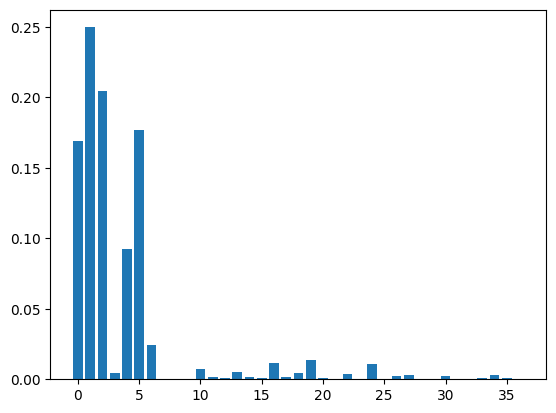

In [94]:
# summarize feature importance
for i,v in enumerate(gb_regressor.feature_importances_):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(gb_regressor.feature_importances_))], gb_regressor.feature_importances_)
plt.show()